### Capstone: Experiement with Various Models
<P> Created January 4, 2022

### Goals
<P> 1. Test different models with data
<P> 2. Define performance metrics 
<P> 3. Test (observe) various loss functions 
<P> Overarching theme for this notebook is to decide which direction to pursue, in regards to our model

#### The following models will be explored: 
<P> 1. U2-Net
<P> 2. Detectron2 
<P> 3. FCN

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json 
import os
import sys
import importlib

In [3]:
sys.path.insert(0, '/Users/narekgeghamyan/Classes/MLE_bootcamp/Capstone_Project')
from processData import ProcessData

In [4]:
import os
from skimage import io, transform
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.transforms as transforms

### Load and process data 

In [7]:
# image properties 
HEIGHT = 512
WIDTH  = 512

In [2]:
# Changing the CWD
os.chdir('/Users/narekgeghamyan/local_data/capstone_data/imaterialist-fashion-2019-FGVC6/train/')
image_dir = '/Users/narekgeghamyan/local_data/capstone_data/imaterialist-fashion-2019-FGVC6/train/'
data_list = os.listdir('/Users/narekgeghamyan/local_data/capstone_data/imaterialist-fashion-2019-FGVC6/train/')

In [3]:
df = pd.read_csv('/Users/narekgeghamyan/local_data/capstone_data/imaterialist-fashion-2019-FGVC6/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331213 entries, 0 to 331212
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        331213 non-null  object
 1   EncodedPixels  331213 non-null  object
 2   Height         331213 non-null  int64 
 3   Width          331213 non-null  int64 
 4   ClassId        331213 non-null  object
dtypes: int64(2), object(3)
memory usage: 12.6+ MB


In [10]:
df_batch = df[:100]

In [11]:
image_batch = ProcessData(df_batch, HEIGHT, WIDTH)
(trn_image, seg_image, img_name_list) = image_batch.get_image_batch()

In [33]:
len(trn_image)

17

### Define performance metrics 

Define performance as error of pixels for each segment (computed - actual) 
<P> For example: If im_1 and im_2 are both np arrays, we may compute error by im1 - im2. 

In [66]:
# segmentation error example 

A = np.array([[1,2,3],[2,3,4],[5,6,4]])
B = np.array([[1,2,4],[1,3,4],[5,7,4]])
error = np.sum(abs(A-B))
error = round(float(error/len(A)**2),2)
print('Error between A and B is: ', str(error))
A-B

Error between A and B is:  0.33


array([[ 0,  0, -1],
       [ 1,  0,  0],
       [ 0, -1,  0]])

In [9]:
def segmentation_error(truth, test):
    # images must be numpy arrays
    error = np.sum(abs(truth-test))
    error = round(float(error/len(truth)**2),2)
    # print('Error between images is ', str(error))
    return(error)

### U2-Net model

In [10]:
sys.path.insert(0, '/Users/narekgeghamyan/Classes/MLE_bootcamp/U-2-Net/')
model_dir = '/Users/narekgeghamyan/Classes/MLE_bootcamp/U-2-Net/saved_models/u2netp/u2netp.pth'
prediction_dir = '/Users/narekgeghamyan/Classes/MLE_bootcamp/U-2-Net/test_data/u2netp_results/'

from save_output import save_output

In [11]:
from data_loader import RescaleT
from data_loader import ToTensor
from data_loader import ToTensorLab
from data_loader import SalObjDataset_modified

from model import U2NET

In [24]:
# img_name_list = data_list[:10]

In [13]:
test_salobj_dataset = SalObjDataset_modified(images = trn_image,
                                    lbl_name_list = [],
                                    transform=transforms.Compose([RescaleT(320),
                                                                  ToTensorLab(flag=0)])
                                    )

test_salobj_dataloader = DataLoader(test_salobj_dataset,
                                    batch_size=1,
                                    shuffle=False,
                                    num_workers=1)

In [14]:
def normPRED(d):
    ma = torch.max(d)
    mi = torch.min(d)

    dn = (d-mi)/(ma-mi)

    return dn

In [15]:
model_name = 'u2net'
net = U2NET(3,1)

net.load_state_dict(torch.load(model_dir, map_location='cpu'))
net.eval()

...load U2NEP---4.7 MB


U2NETP(
  (stage1): RSU7(
    (rebnconvin): REBNCONV(
      (conv_s1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (rebnconv1): REBNCONV(
      (conv_s1): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv2): REBNCONV(
      (conv_s1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv3): REBNCONV(
      (conv_s1): Conv2d(16, 16, 

inferencing: bd89b8a9a641bc94dfc04fedbe3a9b9d.jpg


/Users/narekgeghamyan/opt/anaconda3/envs/pytorch-nightly/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/Users/narekgeghamyan/opt/anaconda3/envs/pytorch-nightly/lib/python3.8/site-packages/torch/nn/functional.py:3627: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/Users/narekgeghamyan/opt/anaconda3/envs/pytorch-nightly/lib/python3.8/site-packages/torch/nn/functional.py:3760: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings

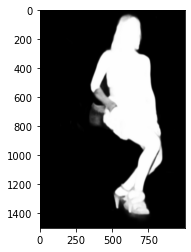

inferencing: c6a96eef11e40695f268070985a8cc29.jpg


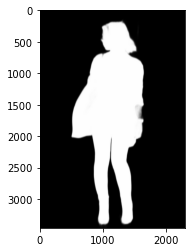

inferencing: fbd547a46c0d33a9c82c0321fa2ff28c.jpg


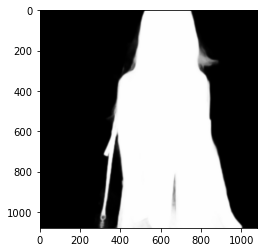

inferencing: 2093d883b50bb436edd0dc9fa8850a08.jpg


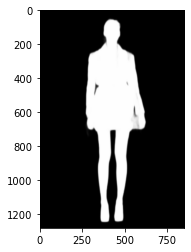

inferencing: d33fd2151a006efa9e31036f587696f2.jpg


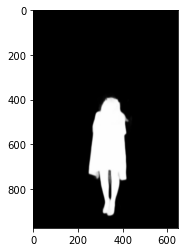

inferencing: ee7a64e2c83fc3a4588426b1ddd01d65.jpg


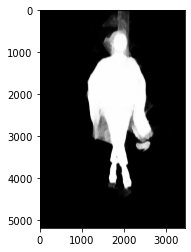

inferencing: 2b151dc7e1600538699d3dbe534ffd2f.jpg


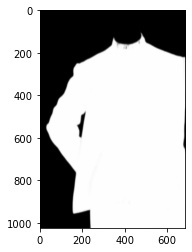

inferencing: 707bf0e46b8c511d47ec2ab6e693935e.jpg


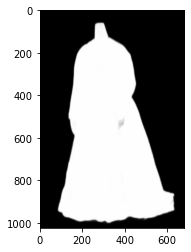

inferencing: f685981fddc9112bc5a965bbe696ce30.jpg


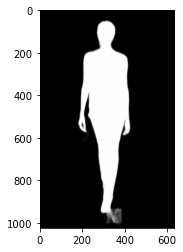

inferencing: 0709ebbfc7998852aab3f405fa8f17a2.jpg


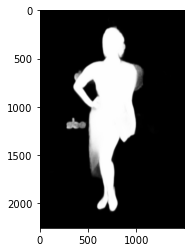

In [16]:
# --------- Inference for images ---------
for i_test, data_test in enumerate(test_salobj_dataloader):

    img_file_name = img_name_list[i_test].split(os.sep)[-1]
    print("inferencing:",img_file_name)

    inputs_test = data_test['image']
    inputs_test = inputs_test.type(torch.FloatTensor)

    if torch.cuda.is_available():
        inputs_test = Variable(inputs_test.cuda())
    else:
        inputs_test = Variable(inputs_test)

    d1,d2,d3,d4,d5,d6,d7= net(inputs_test)

    # normalization
    pred = d1[:,0,:,:]
    pred = normPRED(pred)

    # save results to test_results folder
    if not os.path.exists(prediction_dir):
        os.makedirs(prediction_dir, exist_ok=True)
#     save_output(img_name_list[i_test],pred,prediction_dir)
    save_output(img_file_name, pred, prediction_dir, image_dir)
    
    del d1,d2,d3,d4,d5,d6,d7

### FCN model 

In [5]:
# import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)
# or
# model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet101', pretrained=True)
model.eval()


Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /Users/narekgeghamyan/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /Users/narekgeghamyan/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100.0%


FCN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Module(
      (0): Module(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Module(
          (0): Conv2d(64,

In [16]:
from PIL import Image

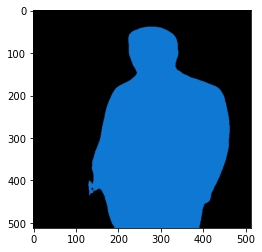

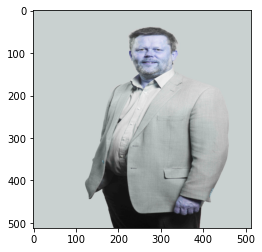

In [36]:
original_image = trn_image[0]
img = original_image.transpose((2,0,1))
img_tensor = torch.from_numpy(img)
input_batch = img_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
# r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(trn_image[0].size)
r = Image.fromarray(output_predictions.byte().cpu().numpy())

r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
plt.show()
plt.imshow(original_image)

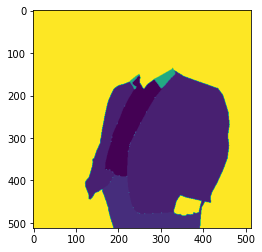

In [37]:
plt.imshow(seg_image[0])